# Introduction

This notebook does some basic visualization. Countplots, bigrams, and some scratch paper for visualizations I may add in the future.

## Libraries

In [2]:
import pandas as pd
pd.set_option("max_columns", None)
pd.set_option('display.max_colwidth', -1)

import json

import numpy as np
np.random.seed(0)

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import re

import string

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.optimizers import Adam

import pickle

Using TensorFlow backend.


## Load

In [81]:
tweet_list = []
for i in range(102):
    with open(f'data_no_RT/data_{i}.txt') as f:
        temp_f = json.load(f)
    for x in range(len(temp_f['statuses'])):
        tweet_list.append(temp_f['statuses'][x]['full_text'])

In [82]:
df = pd.DataFrame(tweet_list)
df.rename(columns = {0:'tweet'}, inplace=True)
df['sentiment'] = 'unlabeled'

In [83]:
with open('labels/labels.txt') as f:
    sentiment_list = json.load(f)
df['sentiment'] = sentiment_list
df['sentiment'].value_counts()

unlabeled    8147
2            992 
3            554 
1            468 
             3   
Name: sentiment, dtype: int64

In [84]:
# Remove rows with blank sentiment
df = df[df['sentiment'] != ""]

## Clean

In [86]:
def basic_clean(text):
    stop_words = stopwords.words("english")
    
    text = re.sub('@\S+', '', text)
    text = re.sub('http\S+', '', text)
    text = re.sub('#\S+', '', text)
    for i in string.punctuation:
        text = text.replace(i, '').lower()
    
    tokens = nltk.word_tokenize(text)
    new_tokens = []
    for token in tokens:
        if token.lower() not in stop_words:
            new_tokens.append(token)
            
    return new_tokens

In [87]:
df.tweet = df.tweet.map(basic_clean)

# Countplot

Countplot of initial labeled set.

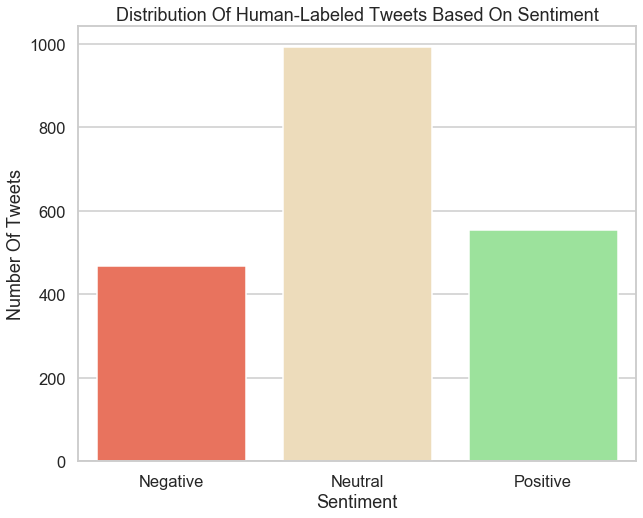

In [98]:
plt.figure(figsize = (10,8))

ax = sns.countplot(df[df['sentiment'] != "unlabeled"].sentiment,
                   palette = ['tomato', 'wheat', 'lightgreen'])

ax.set(xticklabels = ["Negative", "Neutral", "Positive"],
       title = "Distribution Of Human-Labeled Tweets Based On Sentiment",
       ylabel = "Number Of Tweets",
       xlabel = "Sentiment");

Countplot of final set (`df_copy` defined below but cell moved up to have plots together):

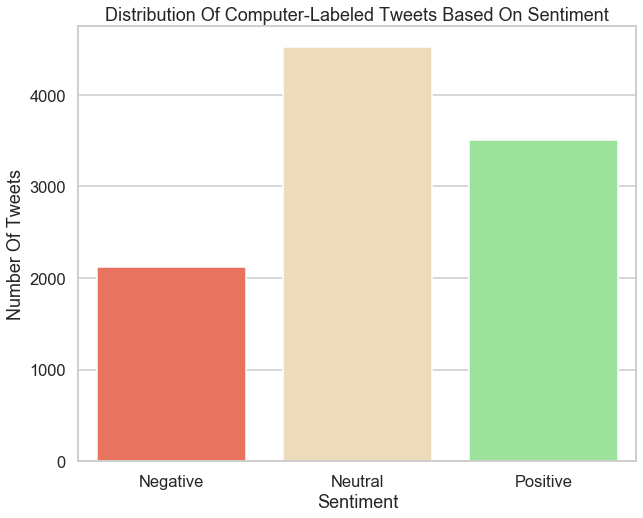

In [92]:
plt.figure(figsize = (10,8))

ax = sns.countplot(df_copy.sentiment,
                   palette = ['tomato', 'wheat', 'lightgreen'])

ax.set(xticklabels = ["Negative", "Neutral", "Positive"],
       title = "Distribution Of Computer-Labeled Tweets Based On Sentiment",
       ylabel = "Number Of Tweets",
       xlabel = "Sentiment");

# N-grams

In [12]:
words = []
for i in range(len(df_copy)):
    words.extend(df_copy.tweet[i])
words

['webcomicart',
 'thing',
 'ive',
 'practic',
 'lot',
 'mayb',
 'pair',
 'giant',
 'breast',
 'help',
 'drown',
 'neg',
 'internet',
 'latenight',
 'phone',
 'call',
 'miss',
 'kid',
 'murder',
 'famili',
 'one',
 'talk',
 'promis',
 'made',
 'kept',
 'though',
 'might',
 'mean',
 '15',
 'yr',
 'old',
 'death',
 'kdp',
 'select',
 'amazon',
 'print',
 'would',
 'mix',
 'medicin',
 'stuff',
 'help',
 'smell',
 'strong',
 'hard',
 'notic',
 'there',
 'anyth',
 'els',
 'mix',
 'best',
 'beliv',
 'imma',
 'take',
 'advantag',
 'amazon',
 'prime',
 'account',
 'well',
 'check',
 'gluttoni',
 'alreadi',
 'avail',
 'purchas',
 '’',
 'look',
 'stori',
 'demand',
 'boss',
 'suddenli',
 'discov',
 'desper',
 'realli',
 'need',
 'tast',
 'assist',
 '’',
 'cream',
 'today',
 'lucki',
 'day',
 'thank',
 'opportun',
 'support',
 '🙂',
 '’',
 'first',
 'three',
 'book',
 'consid',
 'hello',
 'definit',
 'isnt',
 'kind',
 'experi',
 'strive',
 'weve',
 'forward',
 'inform',
 'along',
 'packag',
 'team'

In [13]:
len(words)

127375

In [14]:
from collections import Counter

bigrams = zip(words, words[1:])
counts = Counter(bigrams)
print(counts.most_common())

[(('amazon', 'prime'), 415), (('buy', 'song'), 245), (('gift', 'card'), 206), (('amazon', 'gift'), 171), (('amazon', 'music'), 120), (('avail', 'amazon'), 106), (('amazon', '’'), 106), (('tip', 'point'), 98), (('rainforest', 'savannah'), 93), (('near', 'tip'), 92), (('point', 'switch'), 91), (('switch', 'rainforest'), 89), (('amazon', 'near'), 88), (('–', 'studi'), 81), (('savannah', '–'), 79), (('prime', 'video'), 70), (('prime', 'day'), 67), (('like', 'amazon'), 63), (('calumet', 'edit'), 58), (('new', 'book'), 58), (('jeff', 'bezo'), 57), (('100', 'amazon'), 57), (('stop', 'amazon'), 56), (('abus', 'worker'), 55), (('click', 'listen'), 55), (('listen', 'buy'), 55), (('everi', 'day'), 54), (('amazon', 'abus'), 54), (('wisdom', 'edit'), 53), (('use', 'amazon'), 51), (('amp', 'buy'), 50), (('amazon', 'wishlist'), 49), (('amazon', 'amazon'), 48), (('amazon', 'us'), 47), (('buy', 'amazon'), 47), (('amazon', 'kindl'), 47), (('➡', 'tweet'), 46), (('watch', 'video'), 46), (('vote', 'vote'),

In [25]:
counts.most_common(25)

[(('amazon', 'prime'), 415),
 (('buy', 'song'), 245),
 (('gift', 'card'), 206),
 (('amazon', 'gift'), 171),
 (('amazon', 'music'), 120),
 (('avail', 'amazon'), 106),
 (('amazon', '’'), 106),
 (('tip', 'point'), 98),
 (('rainforest', 'savannah'), 93),
 (('near', 'tip'), 92),
 (('point', 'switch'), 91),
 (('switch', 'rainforest'), 89),
 (('amazon', 'near'), 88),
 (('–', 'studi'), 81),
 (('savannah', '–'), 79),
 (('prime', 'video'), 70),
 (('prime', 'day'), 67),
 (('like', 'amazon'), 63),
 (('calumet', 'edit'), 58),
 (('new', 'book'), 58),
 (('jeff', 'bezo'), 57),
 (('100', 'amazon'), 57),
 (('stop', 'amazon'), 56),
 (('abus', 'worker'), 55),
 (('click', 'listen'), 55)]

In [35]:
counts_words = []
for i in range(25):
    x = counts.most_common(25)[i][0]
    counts_words.append(" ".join(x))
counts_counts = []
for i in range(25):
    counts_counts.append(counts.most_common(25)[i][1])

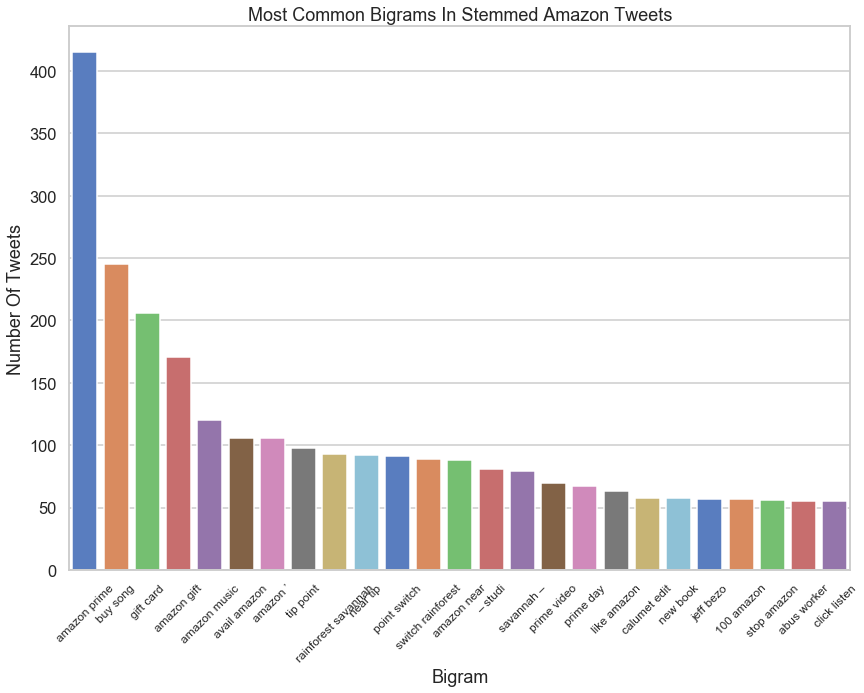

In [48]:
sns.set_context("talk")
plt.figure(figsize = (14,10))
fig = sns.barplot(x = counts_words, y = counts_counts, palette = 'muted')
fig.set_xticklabels(fig.get_xticklabels(), rotation = 45, fontdict = {'fontsize': 12})

fig.set(title = "Most Common Bigrams In Stemmed Amazon Tweets",
       ylabel = "Number Of Tweets",
       xlabel = "Bigram");

In [52]:
counts.most_common()[:-50-1:-1]

[(('654', 'peso'), 1),
 (('4', '654'), 1),
 (('edit', 'playstat'), 1),
 (('custom', 'edit'), 1),
 (('newal', 'custom'), 1),
 (('burst', 'newal'), 1),
 (('kagura', 'burst'), 1),
 (('senran', 'kagura'), 1),
 (('sciuru', 'senran'), 1),
 (('night', 'sciuru'), 1),
 (('least', 'night'), 1),
 (('say', 'least'), 1),
 (('frighten', 'say'), 1),
 (('pollutedit', 'frighten'), 1),
 (('becom', 'pollutedit'), 1),
 (('air', 'becom'), 1),
 (('amp', 'air'), 1),
 (('water', 'amp'), 1),
 (('dissolv', 'amp'), 1),
 (('protect', 'dissolv'), 1),
 (('environment', 'protect'), 1),
 (('happen', 'environment'), 1),
 (('possibl', 'happen'), 1),
 (('tale', 'could'), 1),
 (('cautionari', 'tale'), 1),
 (('amazon', 'cautionari'), 1),
 (('truth', 'amazon'), 1),
 (('battl', 'truth'), 1),
 (('’', 'battl'), 1),
 (('it—hi', 'packag'), 1),
 (('expos', 'it—hi'), 1),
 (('life', 'expos'), 1),
 (('one', 'life'), 1),
 (('sacrific', 'one'), 1),
 (('will', 'sacrific'), 1),
 (('arrigoni', 'will'), 1),
 (('marco', 'arrigoni'), 1),
 

# Scratch Paper

## Average Tweet Length By Sentiment

Didn't end up visualizing this, feel free to ignore.

In [100]:
df_s3 = df_copy[df_copy.sentiment == 3]
df_s2 = df_copy[df_copy.sentiment == 2]
df_s1 = df_copy[df_copy.sentiment == 1]

In [115]:
# for i in [df_s1, df_s2, df_s3]:
#     tweet_length = []
#     for x in range(len(i)):
#         tweet_length.append(len(i.tweet[x]))
#     print(np.mean(tweet_length))

Average length of a tweet in words:

In [106]:
length = []
for i in range(len(df_copy)):
    length.append(len(df_copy.tweet[i]))

In [110]:
np.mean(length)

12.551734331888056

In [116]:
# len_s3 = []
# for i in range(len(df_copy[df_copy['sentiment'] == 3])):
#     len_s3.append(len(df_copy[df_copy['sentiment'] == 3].tweet[i]))